## Naive bayes 
### Objective :
With cleand text data which is amazon food review sql table i.e the data set with class lable with positive review as 1 and negative review as 0 class lable.
1. In this, we need to work with BOW and TFIDF where we will convert our texted review into numerical(vector) form in order to apply any Model on it .
2. As we know our data set is Review of products which besically changes over time so we will first import our table and order our data by time.

3. After that we will take our cleandedtext(i.e cleand text means we have already cleaned our data by removing stops words, other this which are going to affect our model)  and then we will split our cleaned test dataset into three parts i.e Train, CV and test with their respective class lables. 

4. After conveting our text data into vector i.e into numerical form using Bow and TF-IDF here we will not use Word2vec because it doesn't make sense because NB works or assumes that features are conditionally independent but word2vec are assuming features are dependent so the model will misbehave in this case.

5. Now we will try to fit our model using train and cv so that we will able to get best hyper parameter(i.e alpha ) for our model for that we will use k-fold cv. Since this is an imbalanced dataset, we will us metrics like weighted f1-score instead of accuracy to determine optimal value for your hyperparameter..

6. after getting optimal value of alpha i.e hyperparamater for our model we will use that alpha to fit our model and get the test performance measure so that we will able to know how good our model is performing.

7. after fittion our model with train data we will get top important features for both the class lables.

8. for performance measure we will use different measure like weighted f1_score,recall_score ,precision_score and confusion matrix.


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews ORDER BY Time""", conn) 


C:\Users\nisha\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
final = final[:100000]
print(len(final))

100000


In [3]:
CleanedText = final['CleanedText'];
text=final.CleanedText.values
# print(type(text))
#print(CleanedText)
CleanedText_Class = [];
for i in final['Score']:
    if (i == 'positive'):
        CleanedText_Class.append(1)
    else:
        CleanedText_Class.append(0)
    

# len(CleanedText_Class)
# type(CleanedText_Class)

### Spliting the original data into Train,CV and Test

In [4]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# ====================================
# split the data set into train and test for BoW
#X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
X_1, X_test, y_1, y_test = cross_validation.train_test_split(text, CleanedText_Class, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import seaborn as sns; 
def most_informative_feature_for_binary_classification(vectorizer, classifier,n_features,is_print = True):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_log_prob_[0, :], feature_names), reverse=True)[:n_features]
    topn_class2 = sorted(zip(classifier.feature_log_prob_[1, :], feature_names), reverse=True)[:n_features]
    
    if is_print == True:
        print("\nTop %s negative features"% (n_features))
        for coef, feat in topn_class1:
            print(class_labels[0], coef, feat)
        
        print("\nTop %s positive features" %(n_features))
        for coef, feat in reversed(topn_class2):
            print(class_labels[1], coef, feat)
        
    else:
        top_features_dict ={};
        top_negative_features_name_list =[]
        top_positive_features_name_list =[]
        for coef, feat in topn_class1:
            top_negative_features_name_list.append(feat)
            
        for coef, feat in reversed(topn_class2):
            top_positive_features_name_list.append(feat)
            
        top_features_dict ={"top_negative_features_name_list":top_negative_features_name_list,"top_positive_features_name_list":top_positive_features_name_list}
        return top_features_dict;


def top_features_wordcloud_generated_image_fun(features_list):
    wordcloud = WordCloud(width=600, height=600, margin=0,background_color="white").generate(" ".join(features_list))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

## Bow 
#### Applying Bow vectorizer on data 

In [6]:
#BOW 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vocabulary= vectorizer.fit(X_tr)
#print("the shape of out text BOW vectorizer ",vocabulary.get_shape())
#bow_x_tr.shape
# bow_tr_array

In [6]:
bow_x_tr= vectorizer.transform(X_tr)
print("the shape of out text BOW vectorizer ",bow_x_tr.get_shape())

the shape of out text BOW vectorizer  (49000, 26572)


In [7]:
bow_x_cv= vectorizer.transform(X_cv)
print("the shape of out text BOW vectorizer ",bow_x_cv.get_shape())

the shape of out text BOW vectorizer  (21000, 26572)


### Apply Naive Bayes on Bow
The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
##### MultinomialNB on Bow

In [9]:
alpha = []
i=0.0001;
while i<=100:
    alpha.append(i)
    MultinomialNB_clf = MultinomialNB(alpha=i,fit_prior=True, class_prior=None)
    MultinomialNB_clf.fit(bow_x_tr, y_tr)
    pred = MultinomialNB_clf.predict(bow_x_cv)
    f1_score_val = f1_score(y_cv, pred, average="weighted") * float(100)
    print('\nCV accuracy for k = %f is %d%%' % (i, f1_score_val))
    i=i*10;


CV accuracy for k = 0.000100 is 89%

CV accuracy for k = 0.001000 is 90%

CV accuracy for k = 0.010000 is 90%

CV accuracy for k = 0.100000 is 90%

CV accuracy for k = 1.000000 is 90%

CV accuracy for k = 10.000000 is 82%

CV accuracy for k = 100.000000 is 81%


#### Getting the f1_score on bow with optimal value of alpha  

In [21]:
optimal_alpha = 1.000000;
#apply f1_score on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_cv)
f1_score_val = f1_score(y_cv, pred, average="weighted") * float(100)
print('\nCV f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))




CV f1_score for alpha = 1.000000 is 90%


#### Getting Top important Features for Both the Class 

In [11]:
most_informative_feature_for_binary_classification(vectorizer,MultinomialNB_clf,10)

Top 10 negative features
0 -4.311366480412966 tast
0 -4.426879367534811 like
0 -4.5152168287924965 product
0 -4.822673220377797 one
0 -4.906452447796696 flavor
0 -5.0082725203935965 would
0 -5.018170708921379 tri
0 -5.094757332155957 good
0 -5.139323958039576 use
0 -5.254715535829214 order
Top 10 positive features
1 -4.867601713051956 product
1 -4.817406199688948 one
1 -4.758527593198782 use
1 -4.737085917053303 love
1 -4.705235410281068 tea
1 -4.6841396310806065 great
1 -4.666443668049327 flavor
1 -4.651112823849859 good
1 -4.517946897947015 tast
1 -4.472974421835216 like


In [12]:
top_features=most_informative_feature_for_binary_classification(vectorizer,MultinomialNB_clf,20,False)
top_neg_features = top_features["top_negative_features_name_list"]
top_pos_features = top_features["top_positive_features_name_list"]

## Top Positive class Features 

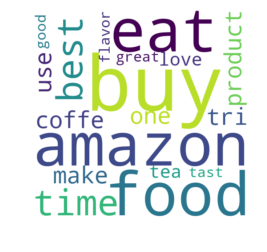

In [15]:
top_features_wordcloud_generated_image_fun(top_pos_features)

## Top Negative class Features

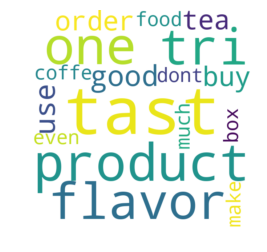

In [16]:
top_features_wordcloud_generated_image_fun(top_neg_features)

### Performance measure of Test Data on Trained Model with optimal value of alpha 

In [24]:
# vectorizing the test data into Bow for model implimentation 
bow_x_test= vectorizer.transform(X_test)
print("the shape of out text BOW vectorizer ",bow_x_test.get_shape())

the shape of out text BOW vectorizer  (30000, 26572)


In [30]:
#apply weighted f1_score on bow with optimal value of alpha 

MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
f1_score_val = f1_score(y_test, pred, average="weighted") * float(100)
print('\nTest weighted f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))


Test weighted f1_score for alpha = 1.000000 is 90%


In [31]:
#apply f1_score on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
f1_score_val = f1_score(y_test, pred) * float(100)
print('\nTest f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))


test f1_score for alpha = 1.000000 is 94%


In [32]:
#apply recall_score on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
recall_score_val = recall_score(y_test, pred) * float(100)
print('\nTest recall_score for alpha = %f is %d%%' % (optimal_alpha, recall_score_val))


Test recall_score for alpha = 1.000000 is 96%


In [33]:
#apply precision_score on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
precision_score_val = precision_score(y_test, pred) * float(100)
print('\nTest precision_score for alpha = %f is %d%%' % (optimal_alpha, precision_score_val))


Test precision_score for alpha = 1.000000 is 93%


In [34]:
#apply confusion_matrix on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
confusion_matrix_val = confusion_matrix(y_test, pred) 
print("\n Test confusion_matrix for alpha = %f " %(optimal_alpha))
print(confusion_matrix_val);


 Test confusion_matrix for alpha = 1.000000 
[[ 1964  1793]
 [  901 25342]]


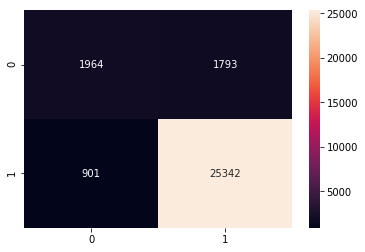

In [38]:
cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [41]:
#apply confusion_matrix on bow with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for alpha = %f " %(optimal_alpha))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for BOW *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for alpha = 1.000000 

******* for BOW *********

****TPR is 96%

****FPR is 47%

****FNR is 3%

****TNR is 52%


******************************************* Bow Ends *************************************

## TF-IDF

In [7]:
#tfidf 
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocabulary = tf_idf_vect.fit(X_tr)
#print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())

In [8]:
tf_idf_x_tr = tf_idf_vect.transform(X_tr)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())

the shape of out text TF-IDF vectorizer  (49000, 727909)


In [9]:
tf_idf_x_cv = tf_idf_vect.transform(X_cv)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_cv.get_shape())

the shape of out text TF-IDF vectorizer  (21000, 727909)


### Apply Naive Bayes on TF-IDF

In [10]:
alpha = []
i=0.0001;
while i<=100:
    alpha.append(i)
    MultinomialNB_clf = MultinomialNB(alpha=i,fit_prior=True, class_prior=None)
    MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
    pred = MultinomialNB_clf.predict(tf_idf_x_cv)
    f1_score_val = f1_score(y_cv, pred, average="weighted") * float(100)
    print('\nCV f1_score for k = %f is %d%%' % (i, f1_score_val))
    i=i*10;


CV f1_score for k = 0.000100 is 86%

CV f1_score for k = 0.001000 is 87%

CV f1_score for k = 0.010000 is 88%

CV f1_score for k = 0.100000 is 83%


C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



CV f1_score for k = 1.000000 is 82%

CV f1_score for k = 10.000000 is 82%

CV f1_score for k = 100.000000 is 82%


C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Getting the f1_score on TF-IDF with optimal value of alpha

In [48]:
optimal_alpha = 0.010000;
#apply f1_score on TF-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_cv)
f1_score_val = f1_score(y_cv, pred, average="weighted") * float(100)
print('\nCV f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))




CV f1_score for alpha = 0.010000 is 87%


#### Getting Top important Features for Both the Class

In [51]:
most_informative_feature_for_binary_classification(tf_idf_vect,MultinomialNB_clf,10)


Top 10 negative features
0 -6.081146357241291 tast
0 -6.230874674548203 product
0 -6.2429203256364785 like
0 -6.54408096320877 would
0 -6.5876461047513875 one
0 -6.591100610364808 flavor
0 -6.694676910516691 buy
0 -6.699144937131711 order
0 -6.725358159478807 coffe
0 -6.736146169667246 tri

Top 10 positive features
1 -6.463424611851502 coffe
1 -6.435535262571469 use
1 -6.406866297086132 product
1 -6.320589310502885 flavor
1 -6.258940909344506 like
1 -6.248944431656814 good
1 -6.239309723162249 tast
1 -6.224080148247841 love
1 -6.172683733652608 great
1 -6.128698794974851 tea


In [52]:
top_features=most_informative_feature_for_binary_classification(tf_idf_vect,MultinomialNB_clf,20,False)
top_neg_features = top_features["top_negative_features_name_list"]
top_pos_features = top_features["top_positive_features_name_list"]

### Top Positive class Features 

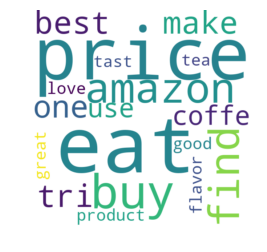

In [53]:
top_features_wordcloud_generated_image_fun(top_pos_features)

### Top Negative class Features

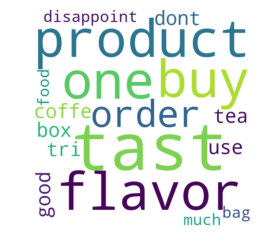

In [54]:
top_features_wordcloud_generated_image_fun(top_neg_features)

### Performance measure of Test Data on Trained Model with optimal value of alpha

In [11]:
tf_idf_x_test= tf_idf_vect.transform(X_test)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_test.get_shape())

the shape of out text TF-IDF vectorizer  (30000, 727909)


In [56]:
#apply weighted f1_score on TF-IDF with optimal value of alpha 

MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_test)
f1_score_val = f1_score(y_test, pred, average="weighted") * float(100)
print('\nTest weighted f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))


Test weighted f1_score for alpha = 0.010000 is 87%


In [57]:
#apply f1_score on TF-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_test)
f1_score_val = f1_score(y_test, pred) * float(100)
print('\nTest f1_score for alpha = %f is %d%%' % (optimal_alpha, f1_score_val))


Test f1_score for alpha = 0.010000 is 94%


In [58]:
#apply recall_score on TF-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_test)
recall_score_val = recall_score(y_test, pred) * float(100)
print('\nTest recall_score for alpha = %f is %d%%' % (optimal_alpha, recall_score_val))


Test recall_score for alpha = 0.010000 is 99%


In [59]:
#apply precision_score on TF-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_test)
precision_score_val = precision_score(y_test, pred) * float(100)
print('\nTest precision_score for alpha = %f is %d%%' % (optimal_alpha, precision_score_val))


Test precision_score for alpha = 0.010000 is 90%


In [60]:
#apply confusion_matrix on TF-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(tf_idf_x_tr, y_tr)
pred = MultinomialNB_clf.predict(tf_idf_x_test)
confusion_matrix_val = confusion_matrix(y_test, pred) 
print("\n Test confusion_matrix for alpha = %f " %(optimal_alpha))
print(confusion_matrix_val);


 Test confusion_matrix for alpha = 0.010000 
[[  926  2831]
 [  139 26104]]


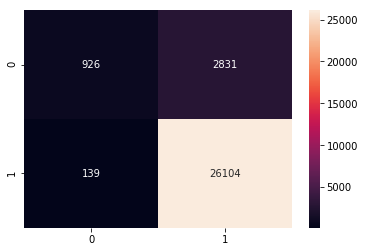

In [61]:
cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [62]:
#apply confusion_matrix on Tf-IDF with optimal value of alpha 
MultinomialNB_clf = MultinomialNB(alpha=optimal_alpha, fit_prior=True, class_prior=None)
MultinomialNB_clf.fit(bow_x_tr, y_tr)
pred = MultinomialNB_clf.predict(bow_x_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for alpha = %f " %(optimal_alpha))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for TF-IDF *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for alpha = 0.010000 

******* for TF-IDF *********

****TPR is 95%

****FPR is 41%

****FNR is 4%

****TNR is 58%


## Summary 

In [71]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter", "Weighted F1","F1","Recall","precision","TPR","FPR","FNR","TNR"]

x.add_row(["BOW","MultinomialNB",1.0,90,94,96,93,96,47,3,52])
x.add_row(["TF-TDF","MultinomialNB",0.01,87,94,99,90,95,41,4,58])

print(x)

+------------+---------------+----------------+-------------+----+--------+-----------+-----+-----+-----+-----+
| Vectorizer |     Model     | HyperParameter | Weighted F1 | F1 | Recall | precision | TPR | FPR | FNR | TNR |
+------------+---------------+----------------+-------------+----+--------+-----------+-----+-----+-----+-----+
|    BOW     | MultinomialNB |      1.0       |      90     | 94 |   96   |     93    |  96 |  47 |  3  |  52 |
|   TF-TDF   | MultinomialNB |      0.01      |      87     | 94 |   99   |     90    |  95 |  41 |  4  |  58 |
+------------+---------------+----------------+-------------+----+--------+-----------+-----+-----+-----+-----+
